# Reducing Customer Churn at Telco

---

## Project Goals

The goal of this project is to identify drivers of customer churn at Telco, produce a prediction model to identify 
which customers are at the highest risk of churning, and offer a recommendation for reducing customer churn.

---

## Project Description

Telco customers are churning at an unacceptably high rate which is affecting the company's bottom line. Retaining
existing customers costs far less than signing new customers. As such we want to reduce churn in order to help
the Telco's bottom line rather than relying on signing new customers to make up the difference. We will compare
and contrast customers who have churned versus those who haven't to determine the attributes that are driving 
customers to churn. We will produce a prediction model to help identify the customers that are at the highest risk 
of churning and we will provide a list of customers who are likely to churn (provided in predictions.csv). Finally, 
we will offer a recommended course of action to help promote customer retention.

---

## Importing the Required Modules

Everything we need to run the code blocks in this report are located in the util folder.
To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.

In [1]:
# Here we are importing all the functions we need to execute the code blocks in this report.

from util.acquire import get_telco_data
from util.prepare import prep_telco_data, split_data
from util.explore import *

# We would like to ignore any warnings provided by the libraries we use for presentation purposes.
import warnings
warnings.filterwarnings("ignore")

---

## Data Acquisition

When running this notebook for the first time the Telco customer data will be acquired from the MySQL database hosted at data.codeup.com. This data will be saved in a file "telco.csv" for quicker access in the future. The "telco.csv" file will only be saved locally and will not be found in the Github repository.

In [2]:
# We will now acquire the Telco customer dataset either from the MySQL database or from a .csv file
# depending on whether or not the data has been saved.

telco_customers = get_telco_data()
# brief_summary(telco_customers)

---

## Data Preparation

To prepare the dataset for exploratory analysis and modeling we needed to remove redundant columns and deal with missing or otherwise unusual values. Missing values could be values that are absent in one form or another and unusual values could be values that do not match the form that the majority of data in a single column follow. Redundant columns would be columns that essentially represent the same data as another column.

*Missing values:* A small number of rows (11 out of 7043) were discovered to have missing values for the total charges column. These were customers who have recently signed a contract with Telco and have not had the opportunity to churn yet. It was decided that these customers could be removed from the dataset without affecting our final results.

*Redundant or otherwise useless columns:* Three columns from our dataset were discovered to either hold data that would not influence customer churn or held data that was the same as another column. It was decided that these columns would be removed from the dataset since we would not need them.

In [3]:
# Here we prepare our dataset so that it will be ready for our exploration and modeling phases.

telco_customers = prep_telco_data(telco_customers)
# brief_summary(telco_customers)

We split our data into three datasets: a train dataset (56% of the original data) will be used for training our machine learning models, a validate dataset (24% of the original data) will be used for comparing the performance of 
models, and a test dataset (20% of the original data) will be used as a final check to see how our best model performs on unseen data.

In [4]:
# Here we split our data into train, validate and test datasets

train, validate, test = split_data(telco_customers, stratify = 'churn')

**Important Note: The validate and test datasets are meant to serve as out of sample data. We only use the validate set to compare our machine learning models and we don't use the test set until we have chosen our best model.**

---

## Exploratory Analysis

With the data prepared we were able to explore the data in order to identify drivers of churn. This was done in four steps:

1. Univariate analysis to identify any groups of customers that make up a large proportion of the whole.
2. Bivariate analysis to visualize how various features compare to the group of customers that have churned.
3. Multivariate analysis to visualize how the most likely drivers of churn relate to each other.
4. Statistical tests to determine if the features identified as being our most likely drivers of churn are valid choices.

**Important Note: In exploratory analysis we only analyze the train dataset to maintain the integrity of our work.**

In the following chart we see the distribution of customers in our data separated into two groups: customers that haven't churned and customers that have churned.

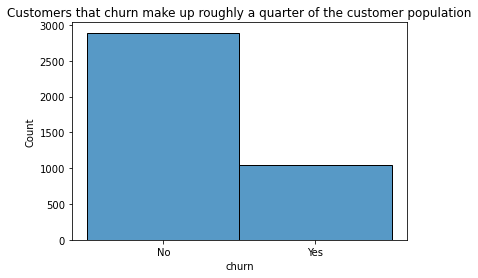

In [5]:
# Here we visualize the distribution of the churn feature in our data.
distribution_of_customer_churn(train)

It was discovered when analyzing the data that the vast majority of customers that churn are on the month to month contract. The following chart displays this finding by showing the distribution of customers who have churned versus those that haven't churned separated by the type of contract the customer has.

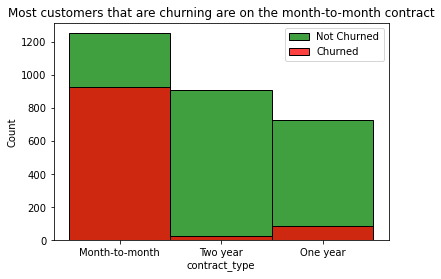

In [6]:
# Here we visualize the distribution of contract types separated by whether or not a customer has churned.
visualize_churn_rate_versus_contract_type(train)

It was also discovered that a large number of customers that churn utilize the electronic check payment method. The following chart displays this finding by showing the distribution of customers who have churned versus those that haven't separated by the payment method the customer uses.

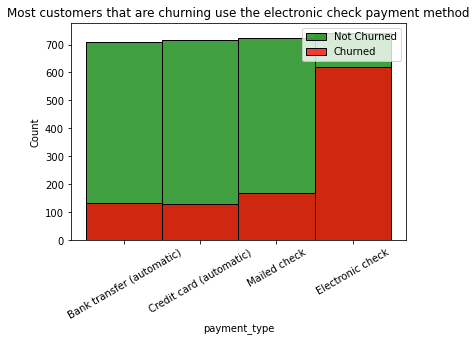

In [7]:
# Here we visualize the distribution of payment types separated by whether or not a customer has churned.
visualize_churn_rate_versus_payment_type(train)

Lastly we found that a large proporation of customers that are churning are doing so in the first 24 months of service and most of these customers have high monthly charges. This last visualization shows the monthly charges of customers that have churned and have less than or equal to 24 months of tenure.

tenure less than or equal to 24, percentage of churn pop.: 71.89%


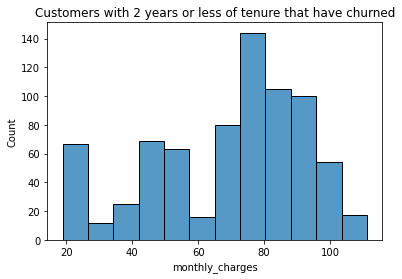

In [8]:
# Here we visualize the monthly charges of customers that have churned and have less than or equal
# to 24 months of tenure.
visualize_monthly_charges_versus_tenure(train)

This then led us to ask the following questions about our data:
- Do customers that churn have higher monthly charges on average than customers that don't churn?
- Do customers that churn have less tenure on average than customers that don't churn?
- Does the contract type a customer has have any association with whether or not they will churn?
- Does the payment method a customer uses have any association with whether or not they will churn?

We formally address these questions in the form of statistical hypotheses and test the validity of these assertions through the use of statistical tests below.

In [9]:
# Enter stats tests code here